In [43]:
%matplotlib notebook

In [18]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl


In [14]:
import neurodiffeq

In [26]:
from neurodiffeq import diff      # the differentiation operation
from neurodiffeq.ode import solve # the ANN-based solver
from neurodiffeq.ode import IVP
import matplotlib.pyplot as plt
from neurodiffeq.ode import Monitor
from neurodiffeq.networks import FCNN
from neurodiffeq.networks import SinActv

In [38]:
from neurodiffeq.ode import solve_system

<IPython.core.display.Javascript object>


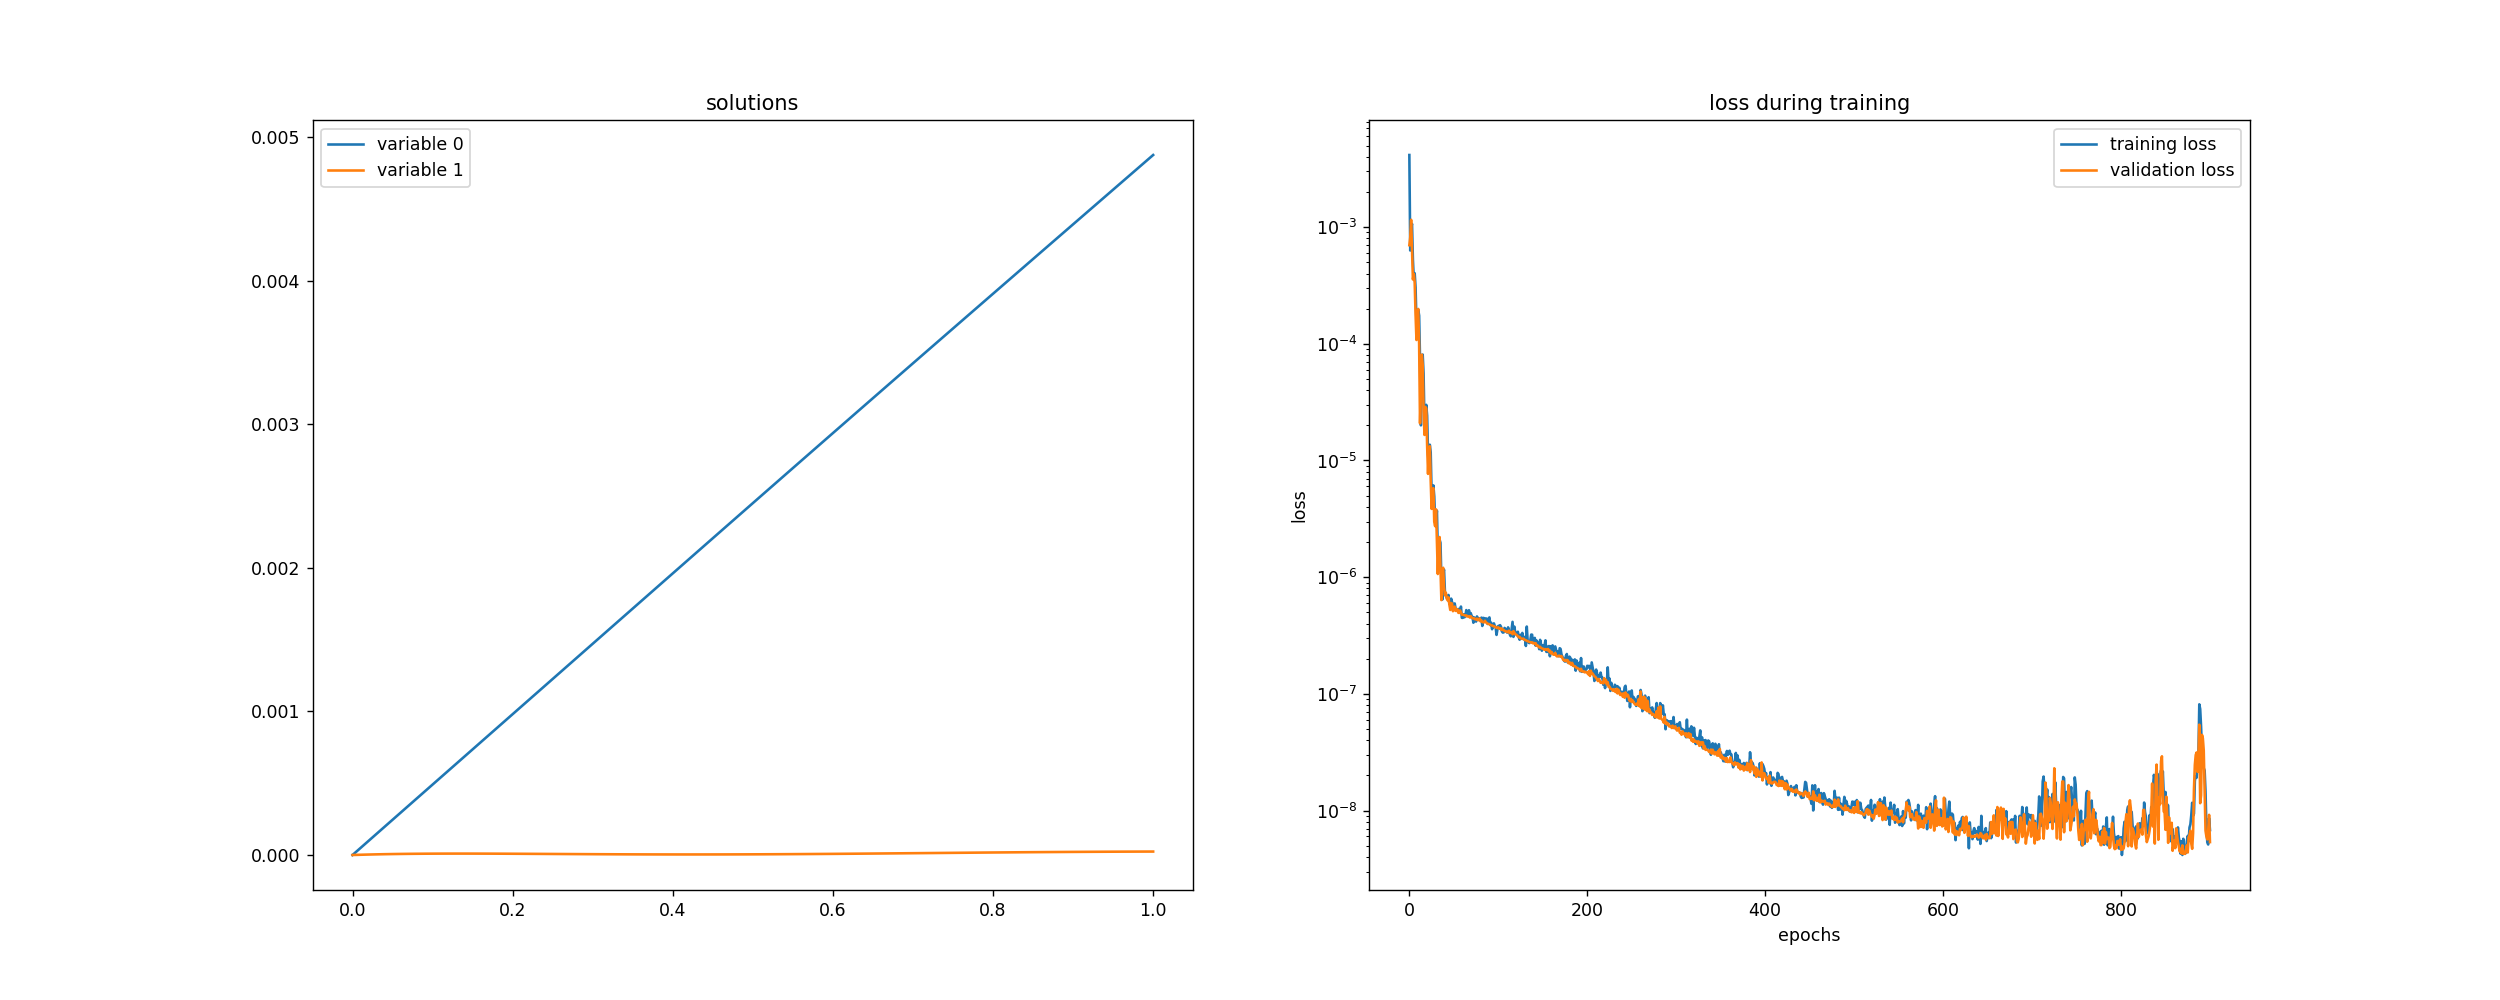

In [88]:
# specify the ODE system # psi is x1, E is x2 and t=x
parametric_circle = lambda x1, x2, t : [(-1/2)*diff(x1, t,order=2)-(x2)*(x1),
                                        diff(x2, t)]
# specify the initial conditions
init_vals_pc = [
    IVP(t_0=0.0, x_0=0),# Confusion here --> What are the boundary conditions?
    IVP(t_0=0.0, x_0=0.0)
]
nets_lv = [
    FCNN(n_hidden_units=32, n_hidden_layers=2, actv=SinActv), # Is the neural network structure fine?
    FCNN(n_hidden_units=32, n_hidden_layers=2, actv=SinActv)
]
# solve the ODE system
solution_pc, _ = solve_system(
    ode_system=parametric_circle, conditions=init_vals_pc, t_min=0.0, t_max=2,
    max_epochs=1000,nets=nets_lv,
    monitor=Monitor(t_min=0.0, t_max=1, check_every=100)
)

<IPython.core.display.Javascript object>


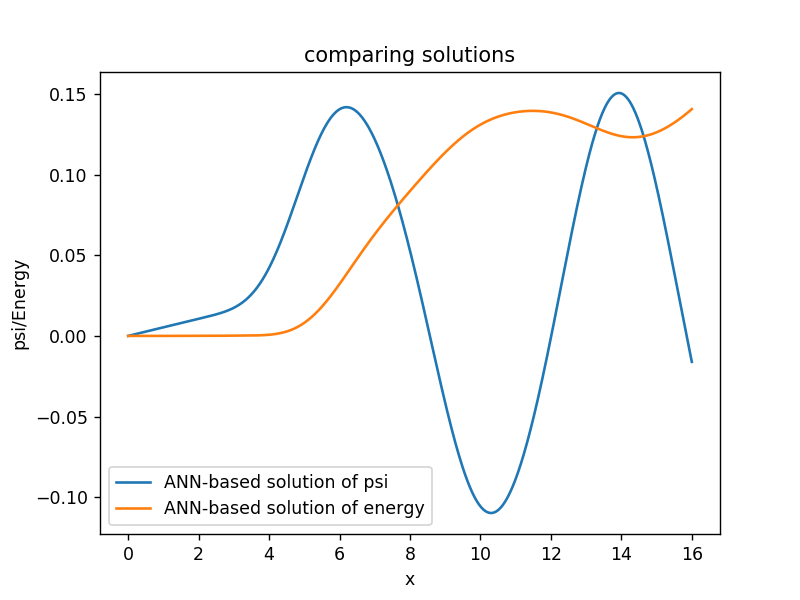

In [90]:
ts = np.linspace(0, 2*8, 1000)
x1_net, x2_net = solution_pc(ts, as_type='np')
plt.figure()
plt.plot(ts, x1_net, label='ANN-based solution of psi')
plt.plot(ts, x2_net, label='ANN-based solution of energy')
plt.ylabel('psi/Energy')
plt.xlabel('x')
plt.title('comparing solutions')
plt.legend()
plt.show()